In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
####1-groupby进行汇总操作,汇总列可是是当个，也可以是一个列表
#通过使用groupby构建了DataFrameGroupBy类型，通过这个类型可以计算各统计值

In [3]:
order_df=pd.read_csv('./OrderDetails.csv')

In [4]:
order_df.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [5]:
order_group=order_df.groupby('ProductID')

In [6]:
type(order_group)

pandas.core.groupby.generic.DataFrameGroupBy

In [7]:
order_group.mean()[['UnitPrice','Quantity','Discount']].head(10)     #计算各列的平均值

,UnitPrice,Quantity,Discount
ProductID,,,
1,15.840000,17.400000,0.056667
2,15.912500,27.687500,0.090625
3,8.800000,34.800000,0.020000
4,19.360000,29.300000,0.080000
5,17.000000,32.250000,0.100000
6,21.666667,35.333333,0.000000
7,27.000000,23.250000,0.050000
8,36.000000,43.500000,0.100000
9,87.300000,18.000000,0.125000


In [8]:
len(order_group.groups)    #计算分组数，相当distinct操作

77

In [9]:
order_group.size().sort_values(ascending=False).head(10)   #分组后，每组中的记录数，相当于count操作

ProductID
59    27
31    26
56    26
24    25
72    23
60    23
62    22
71    22
40    21
75    21
dtype: int64

In [10]:
mul_order=order_df.set_index(['OrderID','ProductID'])

In [11]:
mul_order.head(10)

UnitPrice  Quantity  Discount
OrderID ProductID                               
10248   11              14.0        12      0.00
        42               9.8        10      0.00
        72              34.8         5      0.00
10249   14              18.6         9      0.00
        51              42.4        40      0.00
10250   41               7.7        10      0.00
        51              42.4        35      0.15
        65              16.8        15      0.15
10251   22              16.8         6      0.05
        57              15.6        15      0.05

In [12]:
mul_order.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000 entries, (10248, 11) to (10625, 60)
Data columns (total 3 columns):
UnitPrice    1000 non-null float64
Quantity     1000 non-null int64
Discount     1000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 30.0 KB


In [13]:
mul_order.groupby(level=1).mean().head(10)

,UnitPrice,Quantity,Discount
ProductID,,,
1,15.840000,17.400000,0.056667
2,15.912500,27.687500,0.090625
3,8.800000,34.800000,0.020000
4,19.360000,29.300000,0.080000
5,17.000000,32.250000,0.100000
6,21.666667,35.333333,0.000000
7,27.000000,23.250000,0.050000
8,36.000000,43.500000,0.100000
9,87.300000,18.000000,0.125000


In [14]:
mul_order.groupby(level=0).sum().head(10)

,UnitPrice,Quantity,Discount
OrderID,,,
10248,58.6,27,0.0
10249,61.0,49,0.0
10250,66.9,60,0.3
10251,49.2,41,0.1
10252,94.0,105,0.1
10253,40.4,102,0.0
10254,30.8,57,0.3
10255,88.3,110,0.0
10256,36.6,27,0.0


In [15]:
mul_order.columns

Index([u'UnitPrice', u'Quantity', u'Discount'], dtype='object')

In [16]:
#######2-合并连接
##2-1通过concat函数
##2-2通过append函数
##2-3通过merge函数
##2-4通过join函数

In [17]:
#caoncat
d1=order_df.loc[2:3]
d2=order_df.iloc[2:3]

In [18]:
d2

,OrderID,ProductID,UnitPrice,Quantity,Discount
2,10248,72,34.8,5,0.0


In [19]:
d1

,OrderID,ProductID,UnitPrice,Quantity,Discount
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0


In [20]:
pd.concat([d1,d2])

,OrderID,ProductID,UnitPrice,Quantity,Discount
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
2,10248,72,34.8,5,0.0


In [21]:
d1.append(d2)

,OrderID,ProductID,UnitPrice,Quantity,Discount
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
2,10248,72,34.8,5,0.0


In [22]:
d1.merge(d2,left_on='OrderID',right_on='OrderID')

,OrderID,ProductID_x,UnitPrice_x,Quantity_x,Discount_x,ProductID_y,UnitPrice_y,Quantity_y,Discount_y
0,10248,72,34.8,5,0.0,72,34.8,5,0.0


In [23]:
d1.join(d2,lsuffix='d1',rsuffix='d2',how='inner')

,OrderIDd1,ProductIDd1,UnitPriced1,Quantityd1,Discountd1,OrderIDd2,ProductIDd2,UnitPriced2,Quantityd2,Discountd2
2,10248,72,34.8,5,0.0,10248,72,34.8,5,0.0


In [24]:
######3装置和变形
import pandas as pd
import numpy as np
city_data_dict={'BeiJing' : {'2019-Q1':100000, '2019-Q2':120000, '2019-Q3':150000, '2019-Q4':180000,'region':'华北'},
'ShangHai':{'2019-Q1':120000,'2019-Q2':140000,'2019-Q3':170000,'2019-Q4':190000,'region':'华东'},
'GuangZhou':{'2019-Q1':90000,'2019-Q2':110000,'2019-Q3':160000,'2019-Q4':180000,'region':'华南'},
'ShenZhen':{'2019-Q1':97000, '2019-Q2':112000, '2019-Q3':156000,'2019-Q4':187000,'region':'华南'},
'HangZhou':{'2019-Q1':99000, '2019-Q2':102000, '2019-Q3':166000,'2019-Q4':177000,'region':'华东'},
'ChengDu':{'2019-Q1':109000, '2019-Q2':122000, '2019-Q3':176000,'2019-Q4':197000,'region':'西南'}}
city_data=pd.DataFrame.from_dict(city_data_dict)
city_data_t= pd.DataFrame(city_data.values.T, index=city_data.columns, columns=city_data.index)

In [72]:
city_data_t

,2019-Q1,2019-Q2,2019-Q3,2019-Q4,region
BeiJing,100000,120000,150000,180000,华北
ChengDu,109000,122000,176000,197000,西南
GuangZhou,90000,110000,160000,180000,华南
HangZhou,99000,102000,166000,177000,华东
ShangHai,120000,140000,170000,190000,华东
ShenZhen,97000,112000,156000,187000,华南


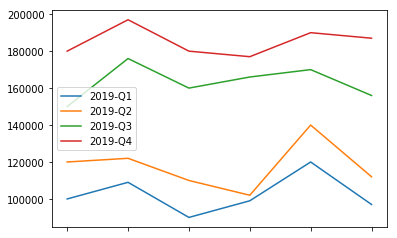

In [73]:
city_data_t.plot()

In [74]:
city_data

,BeiJing,ChengDu,GuangZhou,HangZhou,ShangHai,ShenZhen
2019-Q1,100000,109000,90000,99000,120000,97000
2019-Q2,120000,122000,110000,102000,140000,112000
2019-Q3,150000,176000,160000,166000,170000,156000
2019-Q4,180000,197000,180000,177000,190000,187000
region,华北,西南,华南,华东,华东,华南


In [76]:
#使用pivot函数：返回按给定索引/列值组织的重新构造的DataFrame。
city_data_t.pivot(columns='region',values='2019-Q1')

region,华东,华北,华南,西南
BeiJing,None,100000,None,None
ChengDu,None,None,None,109000
GuangZhou,None,None,90000,None
HangZhou,99000,None,None,None
ShangHai,120000,None,None,None
ShenZhen,None,None,97000,None


In [28]:
data=order_df.head(10)

In [29]:
data_t= pd.DataFrame(data.values.T, index=data.columns, columns=data.index)

In [30]:
data_t

,0,1,2,3,4,5,6,7,8,9
OrderID,10248.0,10248.0,10248.0,10249.0,10249.0,10250.0,10250.00,10250.00,10251.00,10251.00
ProductID,11.0,42.0,72.0,14.0,51.0,41.0,51.00,65.00,22.00,57.00
UnitPrice,14.0,9.8,34.8,18.6,42.4,7.7,42.40,16.80,16.80,15.60
Quantity,12.0,10.0,5.0,9.0,40.0,10.0,35.00,15.00,6.00,15.00
Discount,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.15,0.05,0.05


In [33]:
data

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.00
1,10248,42,9.8,10,0.00
2,10248,72,34.8,5,0.00
3,10249,14,18.6,9,0.00
4,10249,51,42.4,40,0.00
5,10250,41,7.7,10,0.00
6,10250,51,42.4,35,0.15
7,10250,65,16.8,15,0.15
8,10251,22,16.8,6,0.05
9,10251,57,15.6,15,0.05


In [36]:
data.pivot(columns='OrderID',values='UnitPrice')

OrderID,10248,10249,10250,10251
0,14.0,NaN,NaN,NaN
1,9.8,NaN,NaN,NaN
2,34.8,NaN,NaN,NaN
3,NaN,18.6,NaN,NaN
4,NaN,42.4,NaN,NaN
5,NaN,NaN,7.7,NaN
6,NaN,NaN,42.4,NaN
7,NaN,NaN,16.8,NaN
8,NaN,NaN,NaN,16.8
9,NaN,NaN,NaN,15.6
